# Select genetic interactions whose scores (ε) fall below the 0.5% and above the 99.5% quantiles from the ε distribution and save them to a file.
See the directory /mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1 for data and saved files

In [1]:
import datatable as dt
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in GI data
EE = dt.fread("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_ExE.txt") # Essential vs Essential GIs
EN = dt.fread("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_ExN.txt") # Essential vs Nonessential GIs
NN = dt.fread("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_NxN.txt") # Nonessential vs Nonessential GIs
All = dt.fread("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_combined.txt") # Above 3 datasets combined
EE.shape, EN.shape, NN.shape, All.shape

((601690, 12), (1048575, 12), (1048575, 12), (2698840, 12))

In [4]:
EE

,Type,Query Strain ID,Query allele name,Array Strain ID,Array allele name,Arraytype/Temp,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,ExE,YAL001C_tsq508,tfc3-g349e,YBL023C_tsa111,mcm2-1,TSA30,−0.0374,0.0167,0.8101,0.9052,0.6959,0.0133
1,ExE,YAL001C_tsq508,tfc3-g349e,YBL026W_tsa1065,lsm2-5001,TSA30,−0.3045,2.34e-66,0.8101,0.9216,0.442,0.0141
2,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa274,stu1-5,TSA30,0.019,0.429,0.8101,0.8729,0.7261,0.1349
3,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa454,stu1-8,TSA30,0.0141,0.434,0.8101,0.7827,0.6482,0.0732
4,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa643,stu1-6,TSA30,−0.1574,0.00679,0.8101,0.7525,0.4522,0.1435
5,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa822,stu1-12,TSA30,0.0796,0.113,0.8101,0.8836,0.7954,0.086
6,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa950,stu1-7,TSA30,−0.0959,0.074,0.8101,0.6535,0.4335,0.0545
7,ExE,YAL001C_tsq508,tfc3-g349e,YBL035C_tsa365,pol12-ts,TSA30,−0.0549,0.215,0.8101,0.6433,0.4662,0.0708
8,ExE,YAL001C_tsq508,tfc3-g349e,YBL040C_tsa1072,erd2-5001,TSA30,0.021,0.332,0.8101,0.6831,0.5744,0.037


In [5]:
# Summary statistics
EE = EE.to_pandas()
EE.describe()

,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
count,601690.000000,601690.000000,472143.000000,601690.000000,601690.000000,601690.000000
mean,-0.009081,0.204862,0.819379,0.810125,0.686054,0.047408
std,0.086266,0.168448,0.130363,0.136732,0.185699,0.038600
min,-0.790500,0.000000,0.125300,0.111900,-0.101700,0.000000
25%,-0.035300,0.033100,0.745200,0.735300,0.570100,0.023000
50%,0.005000,0.191000,0.843200,0.832700,0.706800,0.038300
75%,0.034800,0.353000,0.917800,0.913800,0.823900,0.060400
max,0.440300,1.000000,1.114600,1.035700,1.337500,1.140700


In [6]:
EN = EN.to_pandas()
EN.describe()

,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
count,1.048575e+06,1.048575e+06,856595.000000,1.047630e+06,1.048575e+06,1.048575e+06
mean,-4.671774e-03,2.531080e-01,0.754338,9.653356e-01,7.669393e-01,4.174734e-02
std,5.610213e-02,1.577767e-01,0.142516,8.937065e-02,1.800584e-01,3.716163e-02
min,-9.616000e-01,0.000000e+00,0.299800,2.265000e-01,-1.696000e-01,0.000000e+00
25%,-2.520000e-02,1.130000e-01,0.681800,9.617000e-01,6.566000e-01,1.970000e-02
50%,-2.000000e-03,2.700000e-01,0.771200,9.928000e-01,7.816000e-01,3.280000e-02
75%,2.120000e-02,3.920000e-01,0.864300,1.011000e+00,9.034000e-01,5.220000e-02
max,1.169400e+00,5.000000e-01,1.033100,1.099800e+00,2.114900e+00,1.080100e+00


In [7]:
NN = NN.to_pandas()
NN.describe()

,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
count,1.048575e+06,1.048575e+06,1.038773e+06,1.047379e+06,1.048575e+06,1.048575e+06
mean,-4.074107e-03,2.773395e-01,9.380953e-01,9.647075e-01,9.014589e-01,4.056054e-02
std,4.364788e-02,1.533175e-01,1.273354e-01,9.004277e-02,1.563489e-01,3.627335e-02
min,-1.041900e+00,0.000000e+00,2.420000e-01,2.265000e-01,-8.070000e-02,0.000000e+00
25%,-2.180000e-02,1.550000e-01,9.317000e-01,9.605000e-01,8.551000e-01,1.900000e-02
50%,-2.400000e-03,3.040000e-01,9.822000e-01,9.928000e-01,9.525000e-01,3.150000e-02
75%,1.720000e-02,4.090000e-01,1.003200e+00,1.011000e+00,1.000300e+00,5.010000e-02
max,7.719000e-01,1.000000e+00,1.058800e+00,1.099800e+00,1.739400e+00,8.854000e-01


In [8]:
All = All.to_pandas()
All.describe()

,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
count,2.698840e+06,2.698840e+06,2.367511e+06,2.696699e+06,2.698840e+06,2.698840e+06
mean,-5.422666e-03,2.517665e-01,8.479347e-01,9.304610e-01,8.011710e-01,4.254829e-02
std,6.021712e-02,1.608598e-01,1.573242e-01,1.207568e-01,1.926122e-01,3.724231e-02
min,-1.041900e+00,0.000000e+00,1.253000e-01,1.119000e-01,-1.696000e-01,0.000000e+00
25%,-2.510000e-02,1.060000e-01,7.552000e-01,8.943000e-01,6.825000e-01,2.010000e-02
50%,-1.300000e-03,2.700000e-01,8.903000e-01,9.812000e-01,8.368000e-01,3.340000e-02
75%,2.210000e-02,3.940000e-01,9.787000e-01,1.005500e+00,9.601000e-01,5.330000e-02
max,1.169400e+00,1.000000e+00,1.114600e+00,1.099800e+00,2.114900e+00,1.140700e+00


In [9]:
# Min-max normalization of GI score (ε)
EE_norm = EE.copy()
EN_norm = EN.copy()
NN_norm = NN.copy()
All_norm = All.copy()
EE_norm["Genetic interaction score (ε)"] = (EE["Genetic interaction score (ε)"]-EE["Genetic interaction score (ε)"].min())/(EE["Genetic interaction score (ε)"].max()-EE["Genetic interaction score (ε)"].min())
EN_norm["Genetic interaction score (ε)"] = (EN["Genetic interaction score (ε)"]-EN["Genetic interaction score (ε)"].min())/(EN["Genetic interaction score (ε)"].max()-EN["Genetic interaction score (ε)"].min())
NN_norm["Genetic interaction score (ε)"] = (NN["Genetic interaction score (ε)"]-NN["Genetic interaction score (ε)"].min())/(NN["Genetic interaction score (ε)"].max()-NN["Genetic interaction score (ε)"].min())
All_norm["Genetic interaction score (ε)"] = (All["Genetic interaction score (ε)"]-All["Genetic interaction score (ε)"].min())/(All["Genetic interaction score (ε)"].max()-All["Genetic interaction score (ε)"].min())

In [10]:
EE_norm

,Type,Query Strain ID,Query allele name,Array Strain ID,Array allele name,Arraytype/Temp,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
0,ExE,YAL001C_tsq508,tfc3-g349e,YBL023C_tsa111,mcm2-1,TSA30,0.611878,1.670000e-02,0.8101,0.9052,0.6959,0.0133
1,ExE,YAL001C_tsq508,tfc3-g349e,YBL026W_tsa1065,lsm2-5001,TSA30,0.394865,2.340000e-66,0.8101,0.9216,0.4420,0.0141
2,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa274,stu1-5,TSA30,0.657702,4.290000e-01,0.8101,0.8729,0.7261,0.1349
3,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa454,stu1-8,TSA30,0.653721,4.340000e-01,0.8101,0.7827,0.6482,0.0732
4,ExE,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa643,stu1-6,TSA30,0.514381,6.790000e-03,0.8101,0.7525,0.4522,0.1435
...,...,...,...,...,...,...,...,...,...,...,...,...
601685,ExE,YPR180W_tsq2481,aos1-5005,YPL228W_tsa420,cet1-15,TSA26,0.644215,4.860000e-01,NaN,0.8044,0.8068,0.0393
601686,ExE,YPR180W_tsq2481,aos1-5005,YPL233W_tsa450,nsl1-5,TSA26,0.611472,3.700000e-02,NaN,0.8471,0.8092,0.0163
601687,ExE,YPR180W_tsq2481,aos1-5005,YPL233W_tsa452,nsl1-6,TSA26,0.623741,2.750000e-01,NaN,0.9983,0.9755,0.0300
601688,ExE,YPR180W_tsq2481,aos1-5005,YPL235W_tsa1202,rvb2-5001,TSA26,0.616103,6.230000e-03,NaN,0.9283,0.8961,0.0099


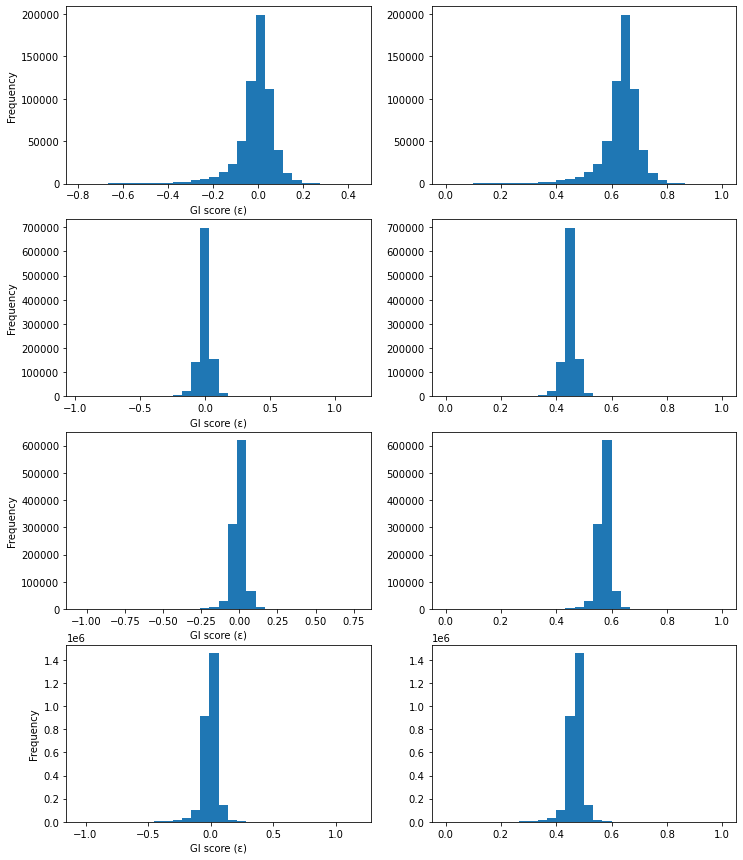

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,15))
ax[0,0].hist(EE["Genetic interaction score (ε)"], bins=100, 
    label=("GI", "GI score (ε)"))
ax[0,0].set_xlabel("GI score (ε)")
ax[0,0].set_ylabel("Frequency")
ax[0,1].hist(EE_norm["Genetic interaction score (ε)"], bins=100, label=("GI", "GI score (ε)"))
ax[1,0].hist(EN["Genetic interaction score (ε)"], bins=100, 
    label=("GI", "GI score (ε)"))
ax[1,0].set_xlabel("GI score (ε)")
ax[1,0].set_ylabel("Frequency")
ax[1,1].hist(EN_norm["Genetic interaction score (ε)"], bins=100, label=("GI", "GI score (ε)"))
ax[2,0].hist(NN["Genetic interaction score (ε)"], bins=100, 
    label=("GI", "GI score (ε)"))
ax[2,0].set_xlabel("GI score (ε)")
ax[2,0].set_ylabel("Frequency")
ax[2,1].hist(NN_norm["Genetic interaction score (ε)"], bins=100, label=("GI", "GI score (ε)"))
ax[3,0].hist(All["Genetic interaction score (ε)"], bins=100, 
    label=("GI", "GI score (ε)"))
ax[3,0].set_xlabel("GI score (ε)")
ax[3,0].set_ylabel("Frequency")
ax[3,1].hist(All_norm["Genetic interaction score (ε)"], bins=100, label=("GI", "GI score (ε)"))
ax[0,0].set_xlabel("GI score (ε)")
ax[0,0].set_ylabel("Frequency")
plt.show()

In [12]:
# Select data below 0.5% (bottom) and above 99.50% (top) quantiles (1% total)
print(EE["Genetic interaction score (ε)"].quantile(0.005), EE["Genetic interaction score (ε)"].quantile(0.995))
print(EN["Genetic interaction score (ε)"].quantile(0.005), EN["Genetic interaction score (ε)"].quantile(0.995))
print(NN["Genetic interaction score (ε)"].quantile(0.005), NN["Genetic interaction score (ε)"].quantile(0.995))
print(All["Genetic interaction score (ε)"].quantile(0.005), All["Genetic interaction score (ε)"].quantile(0.995))
# the thresholds for All do not match any of the above, meaning that this All 
# has a diff no. of GIs than if I were to concatenate the above 3 and take the 1%

-0.4253 0.1843
-0.261713 0.1594
-0.1875 0.122
-0.3016 0.1578


In [13]:
EE_top = EE.loc[EE["Genetic interaction score (ε)"] > 0.1843]
EN_top = EN.loc[EN["Genetic interaction score (ε)"] > 0.1594]
NN_top = NN.loc[NN["Genetic interaction score (ε)"] > 0.122]
All_top = All.loc[All["Genetic interaction score (ε)"] > 0.1578]
print(EE_top.shape, EN_top.shape, NN_top.shape, All_top.shape)

EE_bottom = EE.loc[EE["Genetic interaction score (ε)"] < -0.4253]
EN_bottom = EN.loc[EN["Genetic interaction score (ε)"] < -0.261713]
NN_bottom = NN.loc[NN["Genetic interaction score (ε)"] < -0.1875]
All_bottom = All.loc[All["Genetic interaction score (ε)"] < -0.3016]
print(EE_bottom.shape, EN_bottom.shape, NN_bottom.shape, All_bottom.shape)

(2994, 12) (5242, 12) (5231, 12) (13474, 12)
(2977, 12) (5243, 12) (5239, 12) (13460, 12)


In [14]:
# Does normalization change the subset?
print(EE_norm["Genetic interaction score (ε)"].quantile(0.005), EE_norm["Genetic interaction score (ε)"].quantile(0.995))
print(EN_norm["Genetic interaction score (ε)"].quantile(0.005), EN_norm["Genetic interaction score (ε)"].quantile(0.995))
print(NN_norm["Genetic interaction score (ε)"].quantile(0.005), NN_norm["Genetic interaction score (ε)"].quantile(0.995))
print(All_norm["Genetic interaction score (ε)"].quantile(0.005), All_norm["Genetic interaction score (ε)"].quantile(0.995))

0.2967175820604485 0.7920051998700033
0.32843125293289527 0.5260441107461286
0.47105524313595765 0.6416914764582643
0.33478044589155703 0.5425315425315426


In [15]:
EE_norm_top = EE_norm.loc[EE_norm["Genetic interaction score (ε)"] > 0.7920051998700033]
EN_norm_top = EN_norm.loc[EN_norm["Genetic interaction score (ε)"] > 0.5260441107461286]
NN_norm_top = NN_norm.loc[NN_norm["Genetic interaction score (ε)"] > 0.6416914764582643]
All_norm_top = All_norm.loc[All_norm["Genetic interaction score (ε)"] > 0.5425315425315426]
print(EE_norm_top.shape, EN_norm_top.shape, NN_norm_top.shape, All_norm_top.shape)

EE_norm_bottom = EE_norm.loc[EE_norm["Genetic interaction score (ε)"] < 0.2967175820604485]
EN_norm_bottom = EN_norm.loc[EN_norm["Genetic interaction score (ε)"] < 0.32843125293289527]
NN_norm_bottom = NN_norm.loc[NN_norm["Genetic interaction score (ε)"] < 0.47105524313595765]
All_norm_bottom = All_norm.loc[All_norm["Genetic interaction score (ε)"] < 0.33478044589155703]
print(EE_norm_bottom.shape, EN_norm_bottom.shape, NN_norm_bottom.shape, All_norm_bottom.shape)


(2994, 12) (5242, 12) (5231, 12) (13474, 12)
(2977, 12) (5243, 12) (5239, 12) (13460, 12)


In [16]:
print((EE_top.index == EE_norm_top.index).any())
print((EN_top.index == EN_norm_top.index).any())
print((NN_top.index == NN_norm_top.index).any())
print((All_top.index == All_norm_top.index).any())

True
True
True
True


In [17]:
# Combine dataframes and write to file
EE_sub = pd.concat([EE_top, EE_bottom])
EN_sub = pd.concat([EN_top, EN_bottom])
NN_sub = pd.concat([NN_top, NN_bottom])
All_sub = pd.concat([All_top, All_bottom]) # this is not the same as the above 3 combined!

EE_sub.to_csv("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_ExE_1per.txt")
EN_sub.to_csv("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_ExN_1per.txt")
NN_sub.to_csv("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_NxN_1per.txt")
All_sub.to_csv("/mnt/home/seguraab/Shiu_Lab/Project/Data/Costanzo_S1/SGA_combined_1per.txt")

In [18]:
All_sub.head()

,Type,Query Strain ID,Query allele name,Array Strain ID,Array allele name,Arraytype/Temp,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
30,ExE,YAL001C_tsq508,tfc3-g349e,YBR060C_tsa311,orc2-2,TSA30,0.2459,1.470000e-25,0.8101,0.7238,0.8323,0.0231
69,ExE,YAL001C_tsq508,tfc3-g349e,YBR254C_tsa1174,trs20-5001,TSA30,0.1784,1.000000e+00,0.8101,0.6898,0.7372,0.1155
118,ExE,YAL001C_tsq508,tfc3-g349e,YDL145C_tsa704,cop1-1,TSA30,0.1861,9.430000e-34,0.8101,0.7510,0.7945,0.0149
184,ExE,YAL001C_tsq508,tfc3-g349e,YDR238C_tsa721,sec26-f856aw860a,TSA30,0.2530,1.490000e-03,0.8101,0.8643,0.9532,0.1303
189,ExE,YAL001C_tsq508,tfc3-g349e,YDR280W_tsa1086,rrp45-5001,TSA30,0.2361,4.260000e-08,0.8101,0.9670,1.0195,0.0464


In [27]:
len(All['Query Strain ID'].unique())

1142